In [197]:
# Add dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [198]:
# Load the dataset

df = pd.read_csv("Summaries.csv")
df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,99.99%,100%,tot,inc,place,counts-/accounts/,counts-get-/accounts/current,counts-/notifications/recipients/current,counts-put-/accounts/current,counts-/statistics/current
0,NaN,Aggregated,115,0,31.0,47.816590,12.1837,358.6504,147.930435,1.574048,...,360,360,10,1,1,10,38,16,23,18
1,NaN,Aggregated,670,0,48.0,91.016197,12.1544,686.9521,119.553731,20.637444,...,690,690,100,8,1,100,173,70,87,140
2,NaN,Aggregated,37051,4374,1500.0,2352.068119,27.0270,59374.9364,114.414213,179.832797,...,59000,59000,100,8,1,4027,7410,5374,10807,5386
3,NaN,Aggregated,2671,0,27.0,44.195874,9.4104,661.6296,107.436541,16.190253,...,660,660,100,6,1,100,571,524,905,471
4,NaN,Aggregated,11394,1478,910.0,1175.868294,20.8702,15176.0643,160.929349,131.351740,...,15000,15000,1201,19,1,1918,3352,0,4219,0


In [199]:
df

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,99.99%,100%,tot,inc,place,counts-/accounts/,counts-get-/accounts/current,counts-/notifications/recipients/current,counts-put-/accounts/current,counts-/statistics/current
0,NaN,Aggregated,115,0,31.0,47.816590,12.1837,358.6504,147.930435,1.574048,...,360,360,10,1,1,10,38,16,23,18
1,NaN,Aggregated,670,0,48.0,91.016197,12.1544,686.9521,119.553731,20.637444,...,690,690,100,8,1,100,173,70,87,140
2,NaN,Aggregated,37051,4374,1500.0,2352.068119,27.0270,59374.9364,114.414213,179.832797,...,59000,59000,100,8,1,4027,7410,5374,10807,5386
3,NaN,Aggregated,2671,0,27.0,44.195874,9.4104,661.6296,107.436541,16.190253,...,660,660,100,6,1,100,571,524,905,471
4,NaN,Aggregated,11394,1478,910.0,1175.868294,20.8702,15176.0643,160.929349,131.351740,...,15000,15000,1201,19,1,1918,3352,0,4219,0
5,NaN,Aggregated,17203,2236,360.0,519.779174,15.1500,4903.5521,161.429344,130.346771,...,4900,4900,1147,11,1,2265,4984,0,7689,0
6,NaN,Aggregated,22979,2027,54.0,297.107525,13.7271,6288.8907,170.187476,80.909758,...,5800,6300,640,18,1,1498,7035,0,12948,0
7,NaN,Aggregated,11077,1744,77.0,278.288049,14.2643,2743.6970,160.000632,104.415534,...,2700,2700,640,16,1,1498,3090,0,4997,0
8,NaN,Aggregated,15202,1928,65.0,225.014045,16.1996,2769.4847,162.130838,100.878939,...,2700,2800,640,14,1,1592,433,0,7665,0
9,NaN,Aggregated,12610,1560,75.0,169.125016,12.6516,2531.9757,164.649802,97.992287,...,2500,2500,640,12,1,1406,3704,0,6094,0


tot
inc
place
counts-/accounts/
counts-get-/accounts/current
counts-/notifications/recipients/current
counts-put-/accounts/current
counts-/statistics/current
Average Response Time


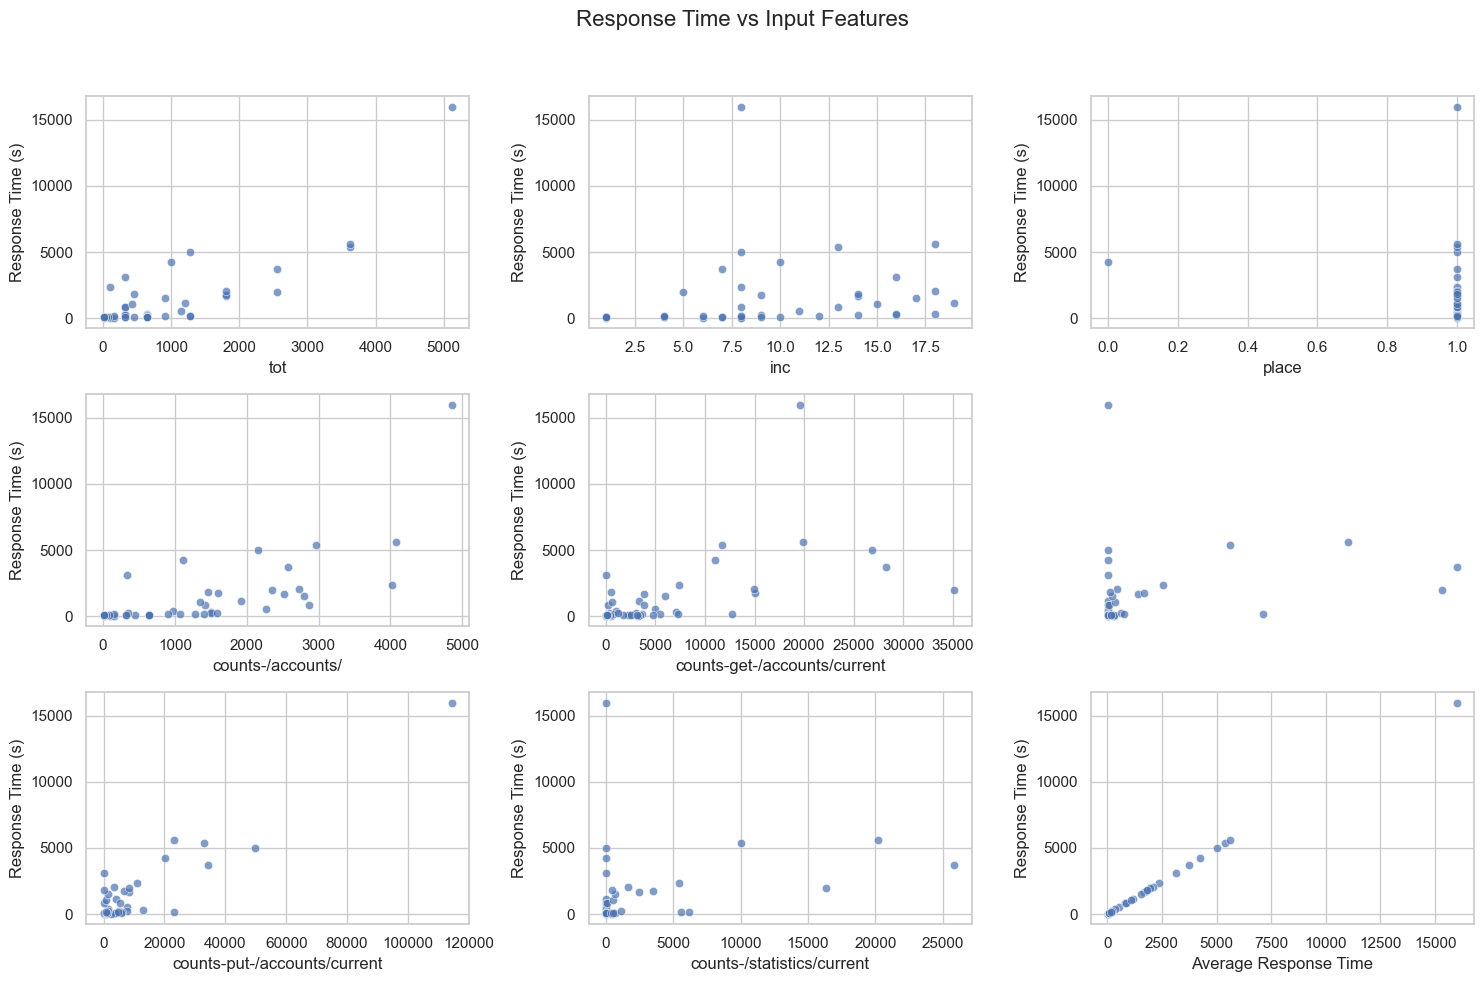

In [200]:
# ======= New: Plot Response Time vs Features =======
# This is mainly for data exploration to understand the relationship between response time and the experiment parameters.
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
fig.suptitle("Response Time vs Input Features", fontsize=16)

features = ["tot", "inc", "place", "counts-/accounts/", "counts-get-/accounts/current", "counts-/notifications/recipients/current","counts-put-/accounts/current", "counts-/statistics/current","Average Response Time",]#The last two are just to make up the numbers. 
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Position in subplot grid
    print(feature)
    sns.scatterplot(ax=axes[row, col], x=df[feature], y=df["Average Response Time"], alpha=0.7)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Response Time (s)")

# Hide the last subplot if there are fewer than 6 plots
axes[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

In [201]:
# Features and target
X = df[["tot", "inc", "place", "counts-/accounts/", "counts-get-/accounts/current", "counts-/notifications/recipients/current","counts-put-/accounts/current", "counts-/statistics/current"]]#The last two are just to make up the numbers. 

y = df["Average Response Time"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [202]:
# Create a pipeline with scaling and the Random Forest model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize features
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Step 2: Train model
])
# Train the model by fitting the pipeline
# TODO: perform hyperparameter tuning
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [203]:
# Perform 10-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean R^2 Score: {cv_scores.mean():.4f}")


Cross-Validation R^2 Scores: [0.42194091 0.7515914  0.34050511]
Mean R^2 Score: 0.5047


In [204]:
# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=kf, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)

In [205]:
# Compute mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

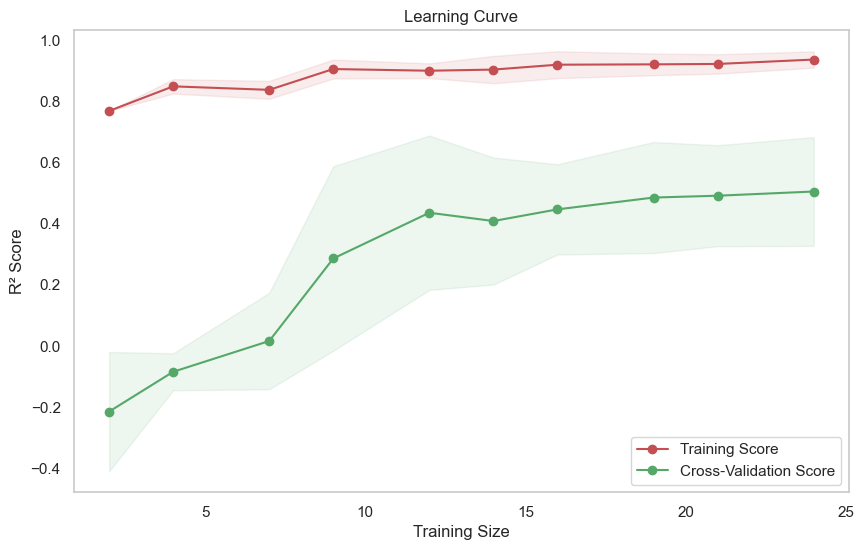

In [206]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [207]:
# Let's create a new observation where num_cliets=7, num_epochs=120, num_requests=5, num_cpu_cores=30, available_memory=30
i=1
new_observation = pd.DataFrame({
        "tot":[30*i],
        "inc":[8],
        "place":[1],
        "counts-/accounts/":[30*i],
        "counts-get-/accounts/current":[300*i],
        "counts-/notifications/recipients/current":[300*i],
        "counts-put-/accounts/current":[300*i],
        "counts-/statistics/current":[300*i],
    })

# Predict response time for the new observation
predicted_response_time = pipeline.predict(new_observation)

print(f"Predicted Response Time: {predicted_response_time[0]:.4f} milliseconds")

Predicted Response Time: 94.8920 milliseconds


In [208]:
# Use the model to find the best resource allocation for a response time less than 60 seconds
#features = ["tot", "inc", "place", "counts-/accounts/", "counts-get-/accounts/current", "counts-/notifications/recipients/current","counts-put-/accounts/current", "counts-/statistics/current","Average Response Time",]#The last two are just to make up the numbers. 


for i in reversed(range(10,101,5)):
    new_observation = pd.DataFrame({
        "tot":[30*i],
        "inc":[8],
        "place":[1],
        "counts-/accounts/":[30*i],
        "counts-get-/accounts/current":[300*i],
        "counts-/notifications/recipients/current":[300*i],
        "counts-put-/accounts/current":[300*i],
        "counts-/statistics/current":[300*i],
    })

    # Predict response time for the new observation
    predicted_response_time = pipeline.predict(new_observation)
    print(f"Predicted Response Time: {predicted_response_time[0]:.4f} milliseconds")
    if predicted_response_time[0] < 600:
        print(f"Most potential clients: {i}")
        break

Predicted Response Time: 3636.0826 milliseconds
Predicted Response Time: 3586.1716 milliseconds
Predicted Response Time: 3286.4659 milliseconds
Predicted Response Time: 3230.2193 milliseconds
Predicted Response Time: 3216.6082 milliseconds
Predicted Response Time: 2615.5077 milliseconds
Predicted Response Time: 2520.6898 milliseconds
Predicted Response Time: 2515.3879 milliseconds
Predicted Response Time: 2300.6756 milliseconds
Predicted Response Time: 1998.7026 milliseconds
Predicted Response Time: 1779.1831 milliseconds
Predicted Response Time: 1357.8120 milliseconds
Predicted Response Time: 1395.2536 milliseconds
Predicted Response Time: 1611.5273 milliseconds
Predicted Response Time: 1380.4070 milliseconds
Predicted Response Time: 1169.7600 milliseconds
Predicted Response Time: 447.6582 milliseconds
Most potential clients: 20


In [209]:
# Features and target
X2 = df[["tot", "inc", "place", "Request Count"]] 

y2 = df["Failure Count"]

# Split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [210]:
# Create a pipeline with scaling and the Random Forest model
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize features
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Step 2: Train model
])
# Train the model by fitting the pipeline
# TODO: perform hyperparameter tuning
pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [211]:
pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [212]:
kf2 = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores2 = cross_val_score(pipeline2, X_train2, y_train2, cv=kf2, scoring='r2')

print(f"Cross-Validation R^2 Scores: {cv_scores2}")
print(f"Mean R^2 Score: {cv_scores2.mean():.4f}")


Cross-Validation R^2 Scores: [0.08951701 0.47692419 0.10260542]
Mean R^2 Score: 0.2230


In [213]:
train_sizes2, train_scores2, test_scores2 = learning_curve(
    pipeline2, X_train2, y_train2, cv=kf2, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 50)
)

c:\Users\natan\anaconda3\envs\superpoint\Lib\site-packages\sklearn\model_selection\_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 23 instead of 50.
  warnings.warn(


In [214]:
train_mean2 = np.mean(train_scores2, axis=1)
train_std2= np.std(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)

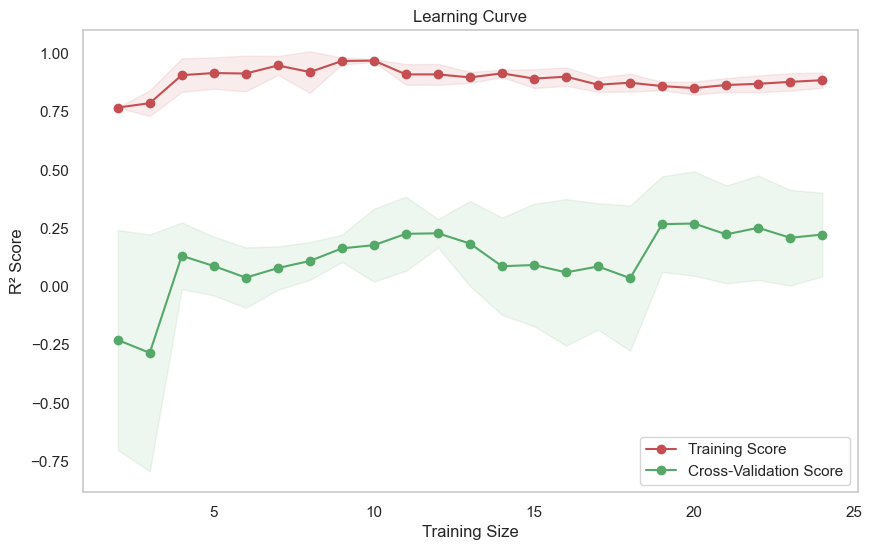

In [215]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes2, train_mean2, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes2, train_mean2 - train_std2, train_mean2 + train_std2, alpha=0.1, color="r")
plt.plot(train_sizes2, test_mean2, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes2, test_mean2 - test_std2, test_mean2 + test_std2, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()